# Data Analysis with python II (tutorial)

## Wladimir Banda-Barragán

Please complete the following problems. You can work with your **TEAM** members.

When you finish, you can call your notebook with the TEAM's name, e.g. TEAM_name.ipynb, and also include your names in the notebook. Then, you can create a pull request to the subfolder **homework** in Session 3.

Note that data for the exercises are not given on purpose. Use online material to **INVESTIGATE** what data you need to solve the problems.

Within a **SINGLE python notebook**, add the following:

### Problem 1.
Calculate:


 - The pressure of the plasma permeating the Solar corona. How does it compare to Earth's atmospheric pressure at the sea level? The number density of the Solar corona is $n=10^9\,\rm cm^{-3}$ and its temperature is $T=2\times 10^6\,\rm K$.
 
 
 - The polytropic index of carbon-monoxide (CO) gas. Hint: Get the degrees of freedom first.


 - The mean particle mass (mean molecular weight) of air in our atmosphere (remember Nytrogen is the most abundant element). Once calculated, add it to the phase diagram $T$ vs. $\mu$ shown in class. How does the value compare to that of atomic hydrogen?


 - The Reynolds number of the blood flow in the aorta. Hint: Use the Internet to get the parameters you need.



In [18]:
import numpy as np
import matplotlib.pyplot as plt

#Pressure of the plasma permeating the Solar corona
def pressure(x, y):
    return (x*1.38e-16*y)
print('Pressure of permeating plasma is:', "{:0.5e}".format(pressure(10**(9),2*10**6.0)))

#Polytropic index of carbon-monoxide (CO) gas. Hint: Get the degrees of freedom first.
def poly_index(f):
    return (1 + 2/f)
print('Polytropic index of (CO) gas is:',poly_index(7) )

#The mean particle mass (mean molecular weight) of air in our atmosphere 
def mean_particlemass(xi,Ai,Zi):
    sum = 0
    for i in range(len(Ai)):
        sum += (x[i]/A[i])*(1 + Z[i])
    mu = 1/sum
    return mu

x = [0.78, 0.21, 0.01] #fraction corresponding to each element, array: N, O, Ar
A = [14,16,40] #mass number of element, array
Z = [0,-2,0] # charge of its nucleus., array
print('Mean particle mass of air is:',mean_particlemass(x,A,Z) )

#Addin the values to the phase diagram
# Plot phase plot, including the two points above.
mu = mean_particlemass(x,A,Z) 
T = 2



Pressure of permeating plasma is: 2.76000e-01
Polytropic index of (CO) gas is: 1.2857142857142856
Mean particle mass of air is: 23.34305960817007


<ipython-input-23-0c0a2ce82ff2>:6: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt((gamma*k_B*temp)/(mu*amu))


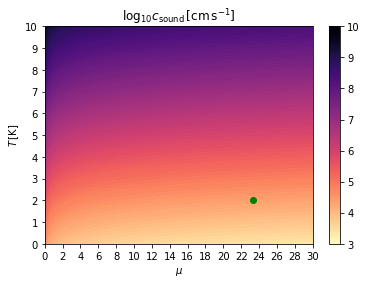

The Reynolds number is 3.88125e+05


In [23]:
# Define the EOS equation
def sound_speed(mu, temp):
    gamma = 5./3.
    k_B = 1.38e-16
    amu = 1.660e-24 
    return np.sqrt((gamma*k_B*temp)/(mu*amu))

# Create a 2D grid with n and T as X and Y.
mu = np.arange(0,30,0.01)
temperature = np.arange(0,10,0.01)

X, Y = np.meshgrid(mu, temperature)

# Compute pressure on the grid
pressure_2D = np.array(sound_speed(np.ravel(X), np.ravel(10**Y)))
Z = pressure_2D.reshape(X.shape)

# Plot pressure
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, np.log10(Z), levels=np.linspace(3, 10, 91), cmap='magma_r')
ax.scatter(23.34, 2, c='green')


# Add a colorbar and customise axes
fig.colorbar(cp, ticks = np.arange(3,11,1))
ax.set_title(r'$\log_{10} c_{\rm sound}\,\rm [cm\,s^{-1}$]')
ax.set_xticks(np.arange(0,31.0,2.0))
ax.set_xlabel(r'$\mu$')
ax.set_yticks(np.arange(0,11,1))
ax.set_ylabel(r'$T\,\rm [K]$')
plt.show()

# Define Re function
def Re_number(rho, vel, length, mu):
    return (rho*vel*length)/(mu)

# All quantities in SI units.

mu=0.004
le=1
rho=1035
vel=1.5


print('The Reynolds number is', "{:0.5e}".format(Re_number(rho,vel,le,mu)))


### Problem 2.
Considering the example of the swimming fish we saw in class, calculate the Reynolds numbers for different swimming speeds and make a plot of $R_{\rm e}$ vs. speed. Indicate the laminar and turbulent regimes on the plot. At which speed does the fish start generating a turbulent flow in sea water?



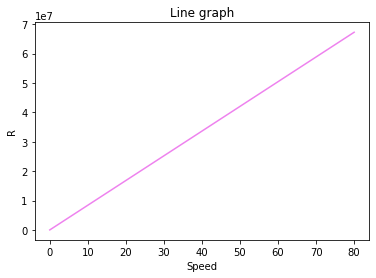

[0, 20, 40, 60, 80]
[0.0, 16819672.13114754, 33639344.26229508, 50459016.39344262, 67278688.52459016]


In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Define Re function

def Re_number(rho, vel, length, mu):
    return (rho*vel*length)/(mu)

# All quantities in SI units.

mu=0.00122
le=1
rho=1026


vel_arr =[]
R_arr =[]
for vel in range(0,100,20):
    vel_arr.append(vel)
    R_arr.append(Re_number(rho,vel,le,mu)) 
    
# plotting
plt.title("Line graph")
plt.xlabel("Speed")
plt.ylabel("R")
plt.plot(vel_arr, R_arr, color ="violet")
plt.show()

print(vel_arr)
print(R_arr)


### Problem 3.
Download the full dataset from the 2D turbulence simulation that we analysed in class (TURB_DRIVE) and:

 - Calculate the rms flow velocity and the corresponding rms Mach number as a function of time (see equations in the lecture notebook).
 
 
 - Save the data into a text file as shown in the example in class, and then make a plot of rms Mach number versus time. Remember that the sound speed of the simulation is $c_{\rm iso}=10\,\rm km\,s^{-1}$.
 
 
 - Based on the result above, is the gas subsonic or supersonic in this simulation?
 
 
 - Calculate the gas pressure using the isothermal equation of state ($p=\rho\,c_{\rm iso}^2$), and make and print a 2D map of the pressure for file #70.
 
 
 - Now that you have the pressure, you can calculate the so-called plasma beta of the gas, which is a dimensionless parameter that relates thermal, $p$, and magnetic pressure $\left(\frac{B^2}{8\,\pi}\right)$. Compute the plasma beta and make and print a 2D map for file #70.
 
 $$\beta = \frac{8\,\pi\,p}{B^2}$$
 

Full Data: https://www.dropbox.com/sh/gt3grmb24no04lp/AAAxAZGErA1E1cpZ0xENF1Xma?dl=0


In [2]:
!pip install vtk

In [4]:
import vtk
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import math

In [10]:
def read_my_vtk(file_name):
    """Read VTK simulation files and returns the variables in CGS units"""
    
    # Path to files
    input_directory="./TURB_DRIVE/"
    file_name = file_name
    times_file = "vtk.out"
    
    # Normalisation values
    l0 = 3.086e+18                    # Length is 1pc
    v0 = 1.e+6                        # Velocity is 10km/s
    rho0 = 1.66e-24                   # In g/cm^3
    mu = 6.72E-01                     # Mean particle mass
    mm = 1.660E-24                    # 1 Atomic mass unit
    kb = 1.380E-16                    # in CGS units
    tem0 = (mu*(mm*(v0**2))/kb)       # in K
    bfi0 = 4*math.pi*(rho0*(v0**2))   # in Gauss

    # Standard VTK loading routines
    reader= vtk.vtkDataSetReader()
    reader.SetFileName(input_directory+file_name)
    reader.ReadAllVectorsOn()
    reader.ReadAllScalarsOn()
    reader.Update()

    # Get data using hearder information
    data = reader.GetOutput() 
    dens = data.GetCellData().GetArray("rho")
    vel1 = data.GetCellData().GetArray("vx1")
    vel2 = data.GetCellData().GetArray("vx2")
    bfi1 = data.GetCellData().GetArray("vx1")
    bfi2 = data.GetCellData().GetArray("vx2")
    
    # Get dimensions, needed to get 3D arrays, instead of 1D vectors
    dim = data.GetDimensions()
    vec = list(dim)
    vec = [i-1 for i in dim]
    
    # Copy data into numpy arrays
    rho = np.array(dens)
    vx1 = np.array(vel1)
    vx2 = np.array(vel2)
    Bx1 = np.array(bfi1)
    Bx2 = np.array(bfi2)
    
    # Reshape them into 3D arrays
    rho = rho.reshape(vec[0],vec[1],order='F')
    vx1 = vx1.reshape(vec[0],vec[1],order='F')
    vx2 = vx2.reshape(vec[0],vec[1],order='F')
    Bx1 = Bx1.reshape(vec[0],vec[1],order='F')
    Bx2 = Bx2.reshape(vec[0],vec[1],order='F')
    
    # In astrophysical units
    rho = rho*rho0       # Gas density in g/cm^3
    nrh = rho/(mu*mm)    # Gas number density in cm^-3
    vx1 = vx1*v0/1.e5    # X-velocity component in km/s
    vx2 = vx2*v0/1.e5    # Y-velocity component in km/s
    Bx1 = Bx1*bfi0       # X-Bfield component in G
    Bx2 = Bx2*bfi0       # Y-Bfield component in G
    
    # Times
    times = ascii.read(input_directory+times_file)
    times = np.array(times['col2'])*l0/v0 # 1D array containing the simulation time in seconds
    
    return times, rho, nrh, vx1, vx2, Bx1, Bx2
    # tr1 is a cloud material tracer


In [11]:
times, dens, number_dens, velx, vely, Bx, By = read_my_vtk('data.0000.vtk')

In [21]:
f = open('data.txt', 'w')
f.write("Time  Mach\n")
c = 10e6

for i in range(0,100,1):
    times, dens, number_dens, velx, vely, Bx, By = read_my_vtk('data.00{:02}.vtk'.format(i))
    average_velx = np.mean(velx)
    average_vely = np.mean(vely)
    mach_num = np.sqrt(average_velx**2 + average_vely**2)/c

    f.write("{:.5e} {:.5e}\n".format(times[i],mach_num))

    
f.close()

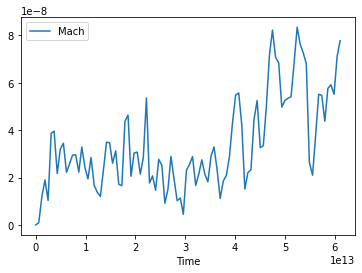

In [27]:
import pandas as pd

data_mach = pd.read_csv('data.txt', sep='\s+') #leo el archivo que creé anteriormente

%matplotlib inline
lines = data_mach.plot.line(x='Time', y='Mach')

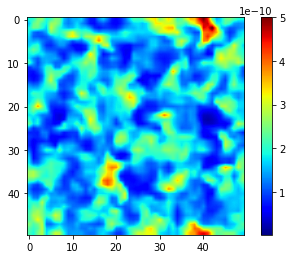

In [33]:
times, density, number_dens, velx, vely, Bx, By = read_my_vtk('data.0070.vtk')

c = 10e6 
pressure = density*c**2              
P = pressure
plt.imshow(P.T, interpolation='bilinear',vmin=1.e-12,vmax=5.e-10,cmap = 'jet')
plt.colorbar()
plt.show()

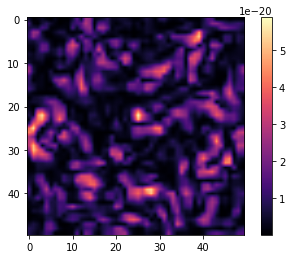

In [35]:
B2 = np.sqrt(Bx**2+By**2)
beta = 8*np.pi*B2**2
plt.imshow(beta.T, interpolation='bilinear', cmap='magma')
plt.colorbar()
plt.show()